In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2hed, hed2rgb

Firstly, tissue images are separated into hematoxylin and diaminobenzidine color channels with color deconvolution

In [2]:
# Example IHC image
import cv2
ihc_rgb = cv2.imread("/content/MultiShoot1.jpg")
from google.colab.patches import cv2_imshow
cv2_imshow(ihc_rgb)

Output hidden; open in https://colab.research.google.com to view.

In [3]:
ihc_hed = rgb2hed(ihc_rgb)

In [4]:
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

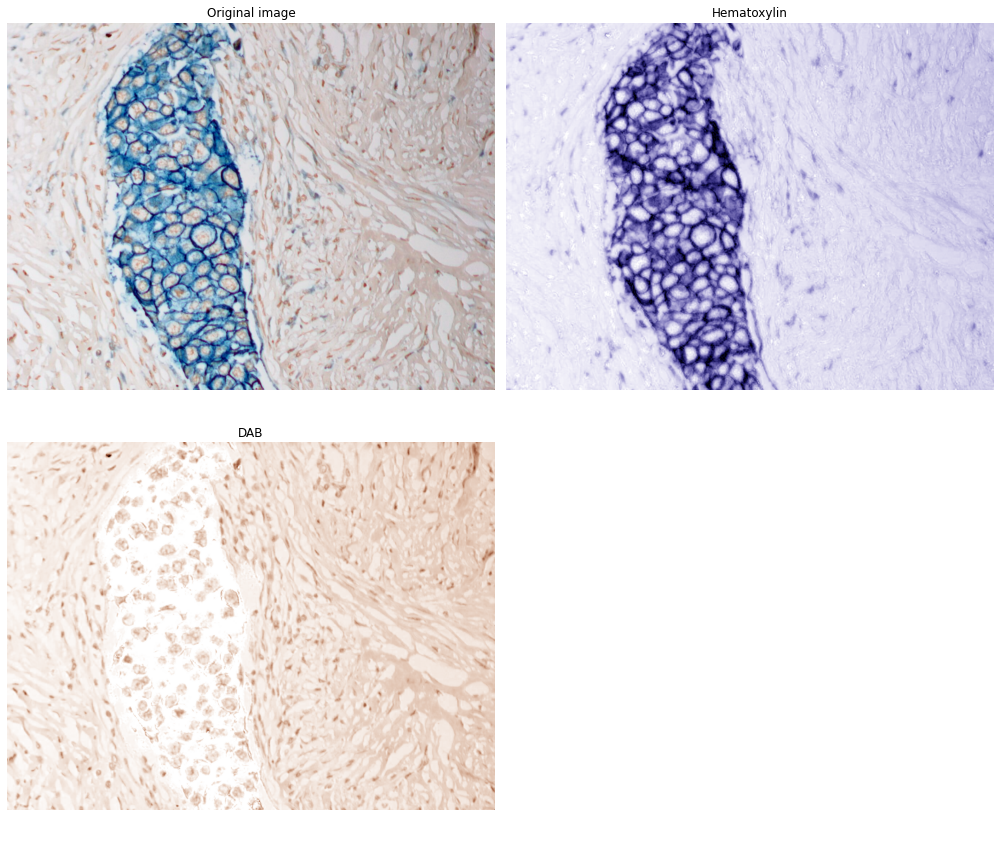

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_d)
ax[2].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

In [6]:
!pip install Image

     |████████████████████████████████| 7.9 MB 5.3 MB/s 
  Created wheel for Image: filename=image-1.5.33-py2.py3-none-any.whl size=19496 sha256=c1860ba8666a26fddcd3dc654eed86e05d6b8306c3b912107af774960159ebd0
  Stored in directory: /root/.cache/pip/wheels/56/88/e6/897194cfe8c08a8b9afd881d3bf53d102e13fa39607d721383
Successfully built Image


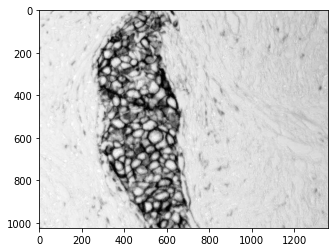

In [7]:
grayscale_img = ihc_h[:, :, 0]
plt.imshow(grayscale_img, cmap='gray')
plt.savefig('test_1.png')

In [8]:
from google.colab.patches import cv2_imshow

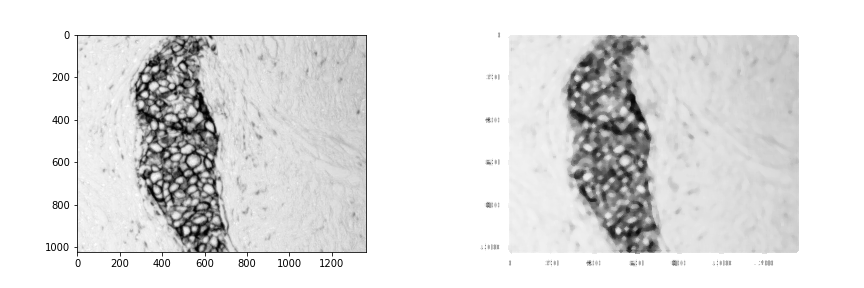

<function destroyAllWindows>

In [9]:
img=cv2.imread('/content/test_1.png')
median = cv2.medianBlur(img, 5)
compare = np.concatenate((img, median), axis=1)

cv2_imshow(compare)
cv2.waitKey(0)
cv2.destroyAllWindows

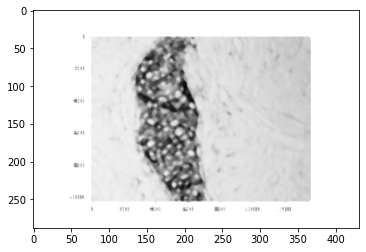

In [14]:
plt.imshow(median)
plt.savefig('test_2.png')

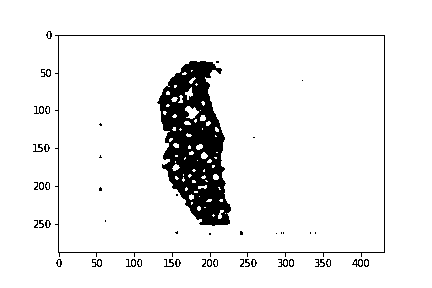

In [22]:
image1 = cv2.imread('test_2.png')
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)         
cv2_imshow(thresh1)                
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()     